In [1]:
#import pandas as pd
#import numpy as np
#import statsmodels.api as sm
#import matplotlib.pyplot as plt

import factors

In [2]:
# Input csv file name located on Desktop and the name of the manager
manager_file = 'lsq.csv'

manager_name = "LSQ"


# Input the geographic allocation of the manager
allocation = [
    ['Canada', 0],
    ['World', 1],
    ['USA', 0],
    ['EAFE', 0],
    ['EM', 0]
]

assert sum([geog[1] for geog in allocation]) == 1, 'Allocation does not equal 100%!'

In [3]:
summary, start, end = factors.equityOLS(manager_file, allocation)

summary

Factor exposures from 2012-03 to 2020-07


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.173   
Dependent Variable: 0.0000           AIC:                525.5512
Date:               2020-11-03 17:11 BIC:                543.8571
No. Observations:   101              Log-Likelihood:     -255.78 
Df Model:           6                F-statistic:        3.045   
Df Residuals:       94               Prob (F-statistic): 0.00913 
R-squared:          0.222            Scale:              9.9623  
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Alpha          2.5318    0.5025   5.0380  0.0000   1.5468   3.5167
Market        -0.3799    0.0993  -3.8253  0.0001  -0.5745  -0.1852
Size          -1.0258    0.6826  -1.5029  0.1329  -2.3636   0.3120
Value         -0.4859    0.4736  -1.0258  0.3050  -1.4142   0.4425
Momentum      -0.0967    0.1980  -0.4884  0.6253  -0.4847   0.2913
Min Vol       -0.3357    0.2011  -1.6690  0.0951  -0.7298   0.0585
Quality        0.1976    0.4087   0.4834  0.6288  -0.6035   0.9987
-----------------------------------------------------------------
Omnibus:             60.723       Durbin-Watson:          1.454  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       290.665
Skew:                1.959        Prob(JB):               0.000  
Kurtosis:            10.329       Condition No.:          7      
=================================================================

"""

In [4]:
factors.exportfactors(summary, manager_name, start, end)

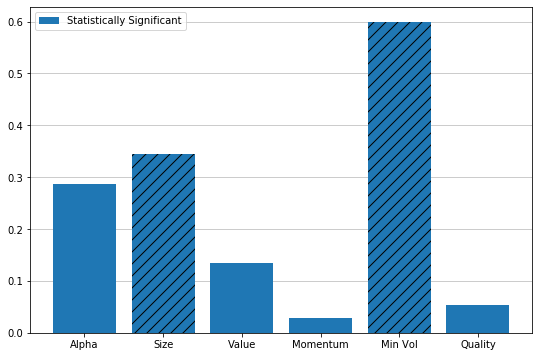

In [4]:
factors.plotsummary(summary, manager_name, start, end)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


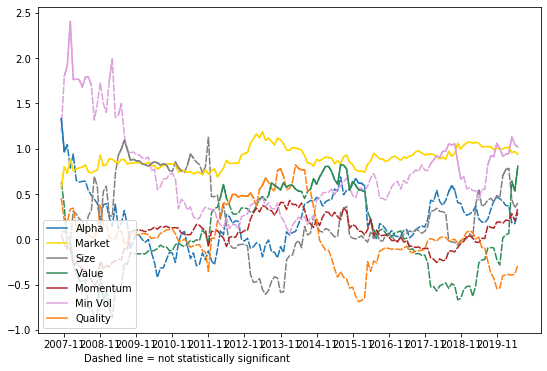

In [5]:
factors.plotrollingsummary(manager_file, manager_name, allocation)

In [5]:
rets, facs = factors.equityprep(manager_file, allocation)

In [6]:
facs.corr()

,MKT,SML,VAL,MOM,MVOL,QTY
MKT,1.000000,0.151638,0.105223,-0.275491,-0.651950,-0.104584
SML,0.151638,1.000000,0.222727,-0.114733,-0.095237,0.178973
VAL,0.105223,0.222727,1.000000,-0.483028,-0.051969,0.031741
MOM,-0.275491,-0.114733,-0.483028,1.000000,0.373216,-0.059436
MVOL,-0.651950,-0.095237,-0.051969,0.373216,1.000000,0.261925
QTY,-0.104584,0.178973,0.031741,-0.059436,0.261925,1.000000
